<a href="https://colab.research.google.com/github/yiwenwangANU/Tensorflow_Certificate/blob/main/Tensorflow_Certificate_Model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py 
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

--2022-06-24 05:21:27--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-06-24 05:21:27 (77.6 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip 
unzip_data("10_food_classes_10_percent.zip")

--2022-06-24 05:21:27--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.194.128, 142.250.4.128, 74.125.200.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.194.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 168546183 (161M) [application/zip]
Saving to: ‘10_food_classes_10_percent.zip.1’

10_food_classes_10_ 100%[===================>] 160.74M   284MB/s    in 0.6s    

2022-06-24 05:21:28 (284 MB/s) - ‘10_food_classes_10_percent.zip.1’ saved [168546183/168546183]



In [ ]:
walk_through_dir("10_food_classes_10_percent")

There are 2 directories and 0 images in '10_food_classes_10_percent'.
There are 10 directories and 0 images in '10_food_classes_10_percent/test'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/pizza'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/steak'.
There are 0 directories and 250 images in '10_food_classes_10_percent/test/ch

In [ ]:
train_dir = '10_food_classes_10_percent/train/'
test_dir = '10_food_classes_10_percent/test/'
IMG_SIZE = (224, 224)

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=train_dir,
                                                                    image_size=IMG_SIZE,
                                                                    label_mode="categorical", 
                                                                    batch_size=32)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(directory=test_dir,
                                                                   image_size=IMG_SIZE,
                                                                   label_mode="categorical", 
                                                                   batch_size=32)

Found 750 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


In [ ]:
class_names = train_dataset.class_names

In [ ]:
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

#Model

In [ ]:
# base_model = tf.keras.applications.MobileNet(include_top=False)
base_model = tf.keras.applications.EfficientNetB0(include_top=False)
base_model.trainable=False

In [ ]:
base_model.summary()

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.2),
  layers.RandomZoom(0.2),
  layers.RandomHeight(0.2),
  layers.RandomWidth(0.2),
], name ="data_augmentation")

In [ ]:
inputs = layers.Input(shape=IMG_SIZE+ (3,))
# x = tf.keras.layers.Rescaling(scale=1./255)(inputs)
x = data_augmentation(inputs)
x = base_model(x)
# x = layers.Dropout(0.2)(x)
x = layers.GlobalAveragePooling2D()(x)
outputs = layers.Dense(units=len(class_names), activation='softmax')(x)

model = tf.keras.Model(inputs, outputs)

In [ ]:
model.summary()

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [ ]:
initial_epochs = 5

history = model.fit(train_dataset,
                        epochs=initial_epochs,
                        validation_data=test_dataset,
                        validation_steps=int(0.1*len(test_dataset)),
                        callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                                  tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)])

Epoch 1/5
24/24 [==============================] - 14s 325ms/step - loss: 2.0280 - accuracy: 0.2893 - val_loss: 1.4843 - val_accuracy: 0.6875 - lr: 0.0010
Epoch 2/5
24/24 [==============================] - 7s 263ms/step - loss: 1.4174 - accuracy: 0.6413 - val_loss: 1.0871 - val_accuracy: 0.7545 - lr: 0.0010
Epoch 3/5
24/24 [==============================] - 7s 260ms/step - loss: 1.1339 - accuracy: 0.7227 - val_loss: 0.8802 - val_accuracy: 0.7946 - lr: 0.0010
Epoch 4/5
24/24 [==============================] - 7s 256ms/step - loss: 0.9324 - accuracy: 0.7707 - val_loss: 0.7815 - val_accuracy: 0.8036 - lr: 0.0010
Epoch 5/5
24/24 [==============================] - 7s 263ms/step - loss: 0.8492 - accuracy: 0.7720 - val_loss: 0.6537 - val_accuracy: 0.8482 - lr: 0.0010


In [ ]:
model.evaluate(test_dataset)

79/79 [==============================] - 6s 69ms/step - loss: 0.7030 - accuracy: 0.8152


[0.7029609680175781, 0.8151999711990356]

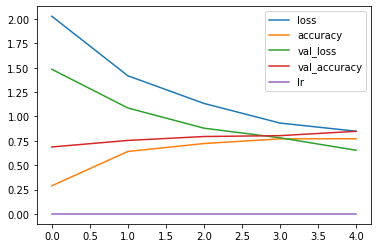

In [ ]:
pd.DataFrame(history.history).plot()

#Fine Tune

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-10]:
  layer.trainable = False

In [ ]:
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(lr=0.0001),
                metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
fine_tune_epochs = initial_epochs + 5

# Refit the model (same as model_2 except with more trainable layers)
history_fine_tune = model.fit(train_dataset,
                              epochs=fine_tune_epochs,
                              validation_data=test_dataset,
                              initial_epoch=history.epoch[-1], # start from previous last epoch
                              validation_steps=int(0.1 * len(test_dataset)),
                              callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True),
                                         tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", patience=2, verbose=1)]) 

Epoch 5/10
24/24 [==============================] - 13s 312ms/step - loss: 0.8857 - accuracy: 0.7600 - val_loss: 0.6344 - val_accuracy: 0.8080 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 6s 223ms/step - loss: 0.7226 - accuracy: 0.8093 - val_loss: 0.6072 - val_accuracy: 0.8393 - lr: 1.0000e-04
Epoch 7/10
24/24 [==============================] - 6s 249ms/step - loss: 0.6557 - accuracy: 0.8400 - val_loss: 0.4909 - val_accuracy: 0.8795 - lr: 1.0000e-04
Epoch 8/10
24/24 [==============================] - 6s 230ms/step - loss: 0.6270 - accuracy: 0.8387 - val_loss: 0.5121 - val_accuracy: 0.8438 - lr: 1.0000e-04
Epoch 9/10
24/24 [==============================] - 6s 236ms/step - loss: 0.5890 - accuracy: 0.8347 - val_loss: 0.4706 - val_accuracy: 0.8616 - lr: 1.0000e-04
Epoch 10/10
24/24 [==============================] - 6s 216ms/step - loss: 0.5252 - accuracy: 0.8613 - val_loss: 0.5117 - val_accuracy: 0.8527 - lr: 1.0000e-04


In [ ]:
model.evaluate(test_dataset)

79/79 [==============================] - 6s 69ms/step - loss: 0.5041 - accuracy: 0.8420


[0.5041154623031616, 0.8420000076293945]

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 data_augmentation (Sequenti  (None, 224, 224, 3)      0         
 al)                                                             
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 906,042
Non-train

In [ ]:
def plot_fine_turn_loss(original_history, new_history, initial_epochs): 
  loss = original_history.history["loss"] + new_history.history["loss"]
  val_loss = original_history.history["val_loss"] + new_history.history["val_loss"]
  accuracy = original_history.history["accuracy"] + new_history.history["accuracy"]
  val_accuracy = original_history.history["val_accuracy"] + new_history.history["val_accuracy"]
  plt.figure(figsize=(10, 7))
  plt.subplot(2, 1, 1)
  plt.plot(loss, label="loss")
  plt.plot(val_loss, label="val_loss")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()
  plt.subplot(2, 1, 2)
  plt.plot(accuracy, label="accuracy")
  plt.plot(val_accuracy, label="val_accuracy")
  plt.plot([initial_epochs-1, initial_epochs-1], plt.ylim(), label="Start Fine Tune")
  plt.legend()

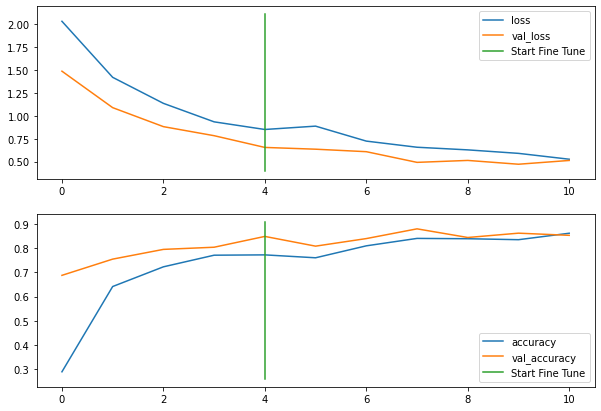

In [ ]:
plot_fine_turn_loss(history,
                    history_fine_tune,
                    5)